In this example we create a toggle flip-flop from a d-flip-flop and an xor. We also demonstrate the use of the Lattice ICE40 backend.

In [1]:
import os
os.environ['MANTLE_TARGET'] = 'ice40'

import magma as m
from mantle import DFF

import mantle lattice ice40
import mantle lattice mantle40


In [2]:
main = m.DefineCircuit('main', 'I', m.In(m.Bit), 'O', m.Out(m.Bit), 'CLK', m.In(m.Clock))

# create ff holding state first
ff = DFF()

# compute the next state
ff( main.I ^ ff.O )

m.wire(ff.O, main.O)
m.wire(main.CLK, ff.CLK)

m.EndDefine()

In [3]:
from magma.simulator.python_simulator import PythonSimulator
from magma.scope import Scope

simulator = PythonSimulator(main, main.CLK)
scope = Scope()
inputs = [1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1]
waveforms = []
for i in range(len(inputs)):
    simulator.set_value(main.I, bool(inputs[i]), scope)
    for j in range(2):
        simulator.advance()
        simulator.evaluate()
        clk = simulator.get_value(main.CLK, scope)
        O = simulator.get_value(main.O, scope)
        waveforms.append([O, bool(inputs[i]), clk])

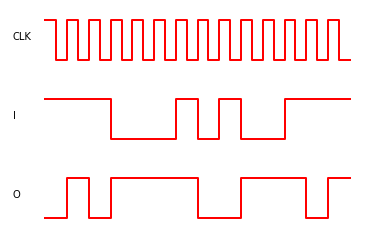

In [4]:
from magma.waveform import waveform

waveform(waveforms, ["O", "I", "CLK"])

In [5]:
m.compile("build/tff", main, include_coreir=True)

compiling XOr2
compiling main


In [6]:
with open("build/tff.v", "r") as tff_verilog:
    print(tff_verilog.read())

`include "/Users/lenny/google_drive/repos/magmathon/magma/magma/backend/coreir_prims.v"
module XOr2 (input [1:0] I, output  O);
wire  inst0_O;
SB_LUT4 #(.LUT_INIT(16'h6666)) inst0 (.I0(I[0]), .I1(I[1]), .I2(1'b0), .I3(1'b0), .O(inst0_O));
assign O = inst0_O;
endmodule

module main (input  I, output  O, input  CLK);
wire  inst0_Q;
wire  inst1_O;
SB_DFF inst0 (.C(CLK), .D(inst1_O), .Q(inst0_Q));
XOr2 inst1 (.I({inst0_Q,I}), .O(inst1_O));
assign O = inst0_Q;
endmodule


